# 特征值和特征向量

- 了解特征值和特征向量的概念
- 掌握计算方法
- 了解它的主要应用


## 矩阵是线性变换

![线性变换](../images/scipy_transform.png)

> 是不是任何向量在经过线性变换之后方向都会改变？


## 特征值和特征向量

- 对于一个矩阵A，如果𝐴𝒗=𝜆𝒗，那么𝒗是一个特征向量，𝜆为相应的特征值
    - 对于特征向量来说，在经过矩阵A变换之后，新的向量和原来方向一样（或相反），长度改变
    - 计算方法：可参考[维基百科](https://zh.wikipedia.org/wiki/%E7%89%B9%E5%BE%81%E5%80%BC%E5%92%8C%E7%89%B9%E5%BE%81%E5%90%91%E9%87%8F#.E8.AE.A1.E7.AE.97.E7.9F.A9.E9.98.B5.E7.9A.84.E7.89.B9.E5.BE.81.E5.80.BC.E5.92.8C.E7.89.B9.E5.BE.81.E5.90.91.E9.87.8F)

- Python中可使用scipy.linalg.eig(A)计算矩阵A的特征值和特征向量
    - 返回值：
        - w：特征值，按从大到小
        - v：特征向量，每一列为相应特征值对应的特征向量
        
![特征向量](../images/scipy_432.png)

## 特征值和特征向量的应用

- 主成分分析（PCA, Principle Component Analysis）
- PageRank
- 人脸识别

- 主成分分析（PCA, Principle Component Analysis）
    - 选取特征值最高的k个特征向量来表示一个矩阵
    - 主要用于降维和特征显示
    
![主成分分析](../images/scipy_433.png)

- PageRank
    - 通过计算状态转移矩阵在稳定状态下的特征向量来给每一个节点打分
    
 ![特征向量](../images/scipy_434.png)

- 人脸识别
    - 使用特征向量将人脸表示为特征脸，任何面部图像都可以表达为它们的线性组合
![图4_3.5.png](图4.3.5.png)

In [2]:
import numpy as np
from scipy.linalg import eig

In [3]:
import matplotlib
from matplotlib import pyplot as plt

# 定义作图函数

# 画一个网格
def display_mat(plt, vmat, color='b'):
    for i in range(vmat.shape[0]):
        plt.plot([vmat[i, 0, 0], vmat[i, -1, 0]], [vmat[i, 0, 1], vmat[i, -1, 1]], color=color)
    for j in range(vmat.shape[1]):
        plt.plot([vmat[0, j, 0], vmat[-1, j, 0]], [vmat[0, j, 1], vmat[-1, j, 1]], color=color)

# 画两个网格，蓝色=变换前的网格，绿色=变换后的网格
# 参数
# mat: 变换矩阵
# x: 网格中x的取值
# y: 网格中y的取值
# 返回值
# z: 变换前的网格
# za: 变换后的网格
def display(mat, x=None, y=None):
    x = np.arange(-2, 8, 1) if x is None else x
    y = np.arange(-2, 8, 1) if y is None else y
    z = np.stack(np.meshgrid(x, y), axis=2)
    display_mat(plt, z)
    za = np.empty_like(z, dtype=np.float_)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            za[i, j, :] = mat.dot(z[i, j, :].reshape((-1,1))).ravel()
    display_mat(plt, za, color='g')
    w, v = eig(mat)
    wreal = np.real(w)
    plt.axes().set_aspect('equal')
    plt.arrow(0, 0, wreal[0]*v[0,0], wreal[0]*v[1,0], color='r')
    plt.arrow(0, 0, wreal[1]*v[0,1], wreal[1]*v[1,1], color='r')
    plt.show()

In [4]:
A = np.array([[1,0.5], [0.5,1]])
# 计算特征值和特征向量
w, v = eig(A)

In [5]:
# 特征值
w

array([1.5+0.j, 0.5+0.j])

In [6]:
# 特征向量
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


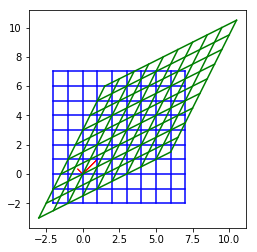

In [7]:
# 蓝色网格：变换前
# 绿色网格：变换后
# 红色：特征向量
display(A)